In [340]:
import pandas as pd
import numpy
import scipy
from pandas import DataFrame, Series
from matplotlib import pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_colwidth', -1)
%matplotlib inline

In [127]:
data = pd.read_csv('data/technical/cleaned_data.csv')
data

,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year
0,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,7670.00,#NUM!,2017-18
1,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2016-17
2,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2015-16
3,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2014-15
4,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2013-14
5,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2012-13
6,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2011-12
7,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2010-11
8,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2009-10
9,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Palliative separations,number,#NUM!,#NUM!,2008-09


In [128]:
data['deliverable'].value_counts()

Total output cost                                                                                                                                                                             1034
Complaints or notifications about public sector corrupt conduct (excluding police personnel conduct and police personnel corrupt conduct) assessed by IBAC within 45 days                       22
Service delivery hours in community health care                                                                                                                                                 22
Economic projects being delivered in accordance with contracted timelines (within 5 per cent variation)                                                                                         22
Number of economic projects in delivery                                                                                                                                                         22
Victoria represented in m

In [142]:
# Convert nm values to null
# Remove rows that have dont have at least one null in values columns
value_cols = ['measure_target', 'estimate_or_actual']
df = data.copy()
for value_col in value_cols:
    df.loc[df[value_col] == '#NUM!', value] = pd.np.nan  
df.dropna(subset = value_cols, inplace = True)
data1 = df
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 23 to 11966
Data columns (total 11 columns):
department_name         5517 non-null object
program_category        5517 non-null object
category_description    4584 non-null object
program_name            5517 non-null object
program_description     5499 non-null object
measure_type            5517 non-null object
deliverable             5517 non-null object
measure_unit            5517 non-null object
measure_target          5517 non-null object
estimate_or_actual      5517 non-null object
year                    5517 non-null object
dtypes: object(11)
memory usage: 517.2+ KB


In [151]:
def convert_to_float(element):
    try:
        ans = float(element)
    except ValueError:
        ans = element
    return ans

In [223]:
# Remove estimate_or_actual values that are not numbers
df = data1.copy()
for value_col in value_cols:
    df[value_col] = pd.to_numeric(df[value_col], errors='coerce').fillna(pd.np.nan)
    df['{}_dtype'.format(value_col)] = df[value_col].map(lambda x: str(type(x)))
data2 = df
data2.info()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5517 entries, 23 to 11966
Data columns (total 13 columns):
department_name             5517 non-null object
program_category            5517 non-null object
category_description        4584 non-null object
program_name                5517 non-null object
program_description         5499 non-null object
measure_type                5517 non-null object
deliverable                 5517 non-null object
measure_unit                5517 non-null object
measure_target              5459 non-null float64
estimate_or_actual          5456 non-null float64
year                        5517 non-null object
measure_target_dtype        5517 non-null object
estimate_or_actual_dtype    5517 non-null object
dtypes: float64(2), object(11)
memory usage: 603.4+ KB


,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype
23,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1774.0,1814.0,2016-17,<class 'float'>,<class 'float'>
24,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1695.0,1720.0,2015-16,<class 'float'>,<class 'float'>
25,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1586.0,1636.0,2014-15,<class 'float'>,<class 'float'>
26,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1477.0,1560.0,2013-14,<class 'float'>,<class 'float'>
27,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1423.0,1477.0,2012-13,<class 'float'>,<class 'float'>
29,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1500.0,1525.0,2010-11,<class 'float'>,<class 'float'>
30,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1468.0,1457.0,2009-10,<class 'float'>,<class 'float'>
31,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1457.0,1409.0,2008-09,<class 'float'>,<class 'float'>
34,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Weighted Inlier Equivalent Separations (WIES) ...,number (000),1241.0,1309.0,2016-17,<class 'float'>,<class 'float'>
35,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Weighted Inlier Equivalent Separations (WIES) ...,number (000),1190.0,1259.0,2015-16,<class 'float'>,<class 'float'>


In [224]:
# Show the data types for value columns
for value_col in value_cols:
    print(df['{}_dtype'.format(value_col)].value_counts())

<class 'float'>    5517
Name: measure_target_dtype, dtype: int64
<class 'float'>    5517
Name: estimate_or_actual_dtype, dtype: int64


In [225]:
# Show lengths of all years
df = data2
df['year'].map(lambda x: len(x)).value_counts()

7    5507
9       8
8       2
Name: year, dtype: int64

In [226]:
# Fix year (brute force - based on string of length 7)
# Take the later-year (ie take 2018 from 2017-2018)
df = data2.copy()
df = df[df['year'].map(lambda x: len(x)) == 7] # Keep only valid years
df['year'] = df['year'].map(lambda x: x[:2] + x[-2:])
df['year'] = pd.to_datetime(df['year'])
data3 = df
df

,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype
23,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1774.0,1814.0,2017-01-01,<class 'float'>,<class 'float'>
24,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1695.0,1720.0,2016-01-01,<class 'float'>,<class 'float'>
25,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1586.0,1636.0,2015-01-01,<class 'float'>,<class 'float'>
26,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1477.0,1560.0,2014-01-01,<class 'float'>,<class 'float'>
27,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1423.0,1477.0,2013-01-01,<class 'float'>,<class 'float'>
29,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1500.0,1525.0,2011-01-01,<class 'float'>,<class 'float'>
30,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1468.0,1457.0,2010-01-01,<class 'float'>,<class 'float'>
31,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1457.0,1409.0,2009-01-01,<class 'float'>,<class 'float'>
34,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Weighted Inlier Equivalent Separations (WIES) ...,number (000),1241.0,1309.0,2017-01-01,<class 'float'>,<class 'float'>
35,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Weighted Inlier Equivalent Separations (WIES) ...,number (000),1190.0,1259.0,2016-01-01,<class 'float'>,<class 'float'>


In [227]:
# Find all programs that have 'Total output cost' deliverable (critical as this is the independent variable)
df = data3.copy()
all_programs = df[['program_name']].drop_duplicates()
print('There are {} programs.'.format(len(all_programs)))
all_programs_w_toc = df[df['deliverable'] == 'Total output cost'].drop_duplicates(subset = ['program_name'])
print("{} of these programs have 'Total output cost'".format(len(all_programs_w_toc)))

There are 100 programs.
89 of these programs have 'Total output cost'


In [228]:
# Of programs that have 'Total output cost', find those that have the most deliverables
# (Note some deliverables will be missing from original spreadsheet as they were either null or not valid numbers)
df = data3.copy()
df = df[df['program_name'].isin(all_programs_w_toc['program_name'])]
deliverable_count = df[['program_name', 'deliverable']].drop_duplicates().groupby('program_name')[['deliverable']].count().sort_values(by = ['deliverable'], ascending = False)
deliverable_count

,deliverable
program_name,
"Transport Safety, Security and Emergency Management",35
School Education – Secondary,29
Agriculture,25
Train Services,23
School Education – Primary,23
Admitted Services,21
Disability Services,19
Creative Industries Portfolio Agencies,17
"Planning, Building and Heritage",17


In [235]:
# Filter by program name, make all deliverables to be columns with values either 'measure_target' or 'estimate_or_actual'
# This is usefuly if wanted to use deliverables as independent variables against dependent variable Total output cost
# (In reality it will be the other way around. Total output cost is the deliverable.)
def normalise_program(df, program, values):
    tmp = df[df['program_name'] == program][['year', 'deliverable', 'estimate_or_actual']]
    return tmp.pivot_table(values = values, index = 'year', columns = 'deliverable')

In [236]:
# Generator to get a normalised dataframe for each program (as per normalise_program)
def normalised_programs_df(df, programs, values):
    for program in programs:
        yield normalise_program(df, program, values)

In [238]:
# For some programs of interest, find what data we have for some 'actual' deliverable values per financial year
programs_of_interest = ['Child Protection and Family Services', 'Ambulance Emergency Services', 'Early Childhood Development']
df = data3.copy()
for program_df in normalised_program_df(df, programs_of_interest, 'estimate_or_actual'):
    display(program_df)

deliverable,Children and young people in out-of-home care who have had two or less placements in the last 12 months (not including placements at home),Children and young people who were the subject of a substantiated report within 12 months of the closure of a previous substantiated report,"Children and young people who were the subject of an investigation which led to a decision not to substantiate, who were subsequently the subject of a substantiation within three months of case closure",Daily average number of children in out-of-home care placements,Number of Child FIRST assessments and interventions,Number of children in kinship care whose placements are managed by community service organisations,Number of children receiving an intensive support service,Number of family services cases provided to Aboriginal families,Organisations that have successfully completed a certification review (family and community services),Organisations that have successfully completed a certification review (specialist support and placement services),"Percentage of child protection investigations assessed as urgent, that were visited, or where attempts were made to visit, within two days of receipt of the report","Proportion of Aboriginal children placed with relatives/kin, other Aboriginal carers or in Aboriginal residential care",Proportion of placements that are home-based care,Reports to child protection services about the wellbeing and safety of children,Sexual assault support services clients receiving an initial response within five working days of referral,Total number of family services cases provided,Total output cost
year,,,,,,,,,,,,,,,,,
2009-01-01,NaN,13.20,2.90,5835.0,NaN,NaN,NaN,NaN,NaN,NaN,94.00,NaN,91.60,42839.0,95.8,24357.0,NaN
2010-01-01,NaN,12.11,2.62,5951.0,8865.0,NaN,900.0,1582.0,NaN,100.0,94.93,NaN,91.10,47481.0,98.0,26223.0,612.0
2011-01-01,NaN,10.30,2.29,6119.0,9814.0,NaN,962.0,1721.0,NaN,100.0,94.10,NaN,92.47,55137.0,99.0,26790.0,670.2
2012-01-01,NaN,13.40,1.70,6434.0,9709.0,NaN,954.0,1800.0,NaN,100.0,93.40,NaN,92.20,63830.0,98.0,28835.0,711.1
2013-01-01,86.4,14.80,1.80,6828.0,10780.0,750.0,917.0,1982.0,100.0,100.0,95.10,60.4,92.50,73297.0,98.5,29123.0,769.6
2014-01-01,91.0,16.00,3.00,7283.0,12142.0,666.0,1410.0,2388.0,100.0,100.0,97.00,64.0,93.00,82075.0,98.0,31962.0,812.4
2015-01-01,90.3,16.80,2.40,8043.0,13576.0,715.0,1400.0,2346.0,98.7,100.0,96.70,69.9,94.20,91348.0,96.4,33285.0,889.9
2016-01-01,91.0,16.50,2.50,8752.0,15190.0,752.0,1400.0,2342.0,100.0,100.0,96.20,72.0,94.80,106909.0,97.5,35448.0,1006.7
2017-01-01,91.0,16.00,3.00,8948.0,17396.0,838.0,1400.0,2728.0,100.0,100.0,97.00,72.0,95.00,115000.0,98.0,39399.0,1184.1


deliverable,Audited cases attended by Community Emergency Response Teams (CERT) meeting clinical practice standards,Audited cases statewide meeting clinical practice standards,CERT arrival occurs prior to ambulance,Community Service Obligation emergency road and air transports,Proportion of adult VF/VT cardiac arrest patients with vital signs at hospital,Proportion of adult patients suspected of having a stroke who were transported to a stroke unit with thrombolysis facilities within 60 minutes,Proportion of emergency (Code 1) incidents responded to within 15 minutes in centres with more than 7 500 population,Proportion of emergency (Code 1) incidents responded to within 15 minutes – statewide,Proportion of patients experiencing severe cardiac or traumatic pain whose level of pain is reduced significantly,Proportion of patients very satisfied or satisfied with overall services delivered by paramedics,Statewide emergency air transports,Statewide emergency road transports,Total output cost,Treatment without transport
year,,,,,,,,,,,,,,
2009-01-01,NaN,98.3,82.1,NaN,NaN,NaN,88.2,82.5,87.7,97.0,NaN,NaN,423.4,NaN
2010-01-01,96.2,97.9,85.7,NaN,NaN,NaN,86.9,80.7,91.1,98.0,NaN,NaN,442.0,NaN
2011-01-01,96.2,97.8,87.6,NaN,NaN,NaN,82.8,77.1,92.0,98.0,NaN,NaN,477.6,NaN
2012-01-01,94.8,97.8,85.6,NaN,NaN,NaN,79.8,74.8,92.4,97.0,NaN,NaN,487.0,NaN
2013-01-01,91.0,97.0,84.7,NaN,NaN,NaN,78.1,73.0,92.5,98.0,NaN,NaN,524.0,NaN
2014-01-01,94.9,98.6,85.0,NaN,52.9,85.5,78.5,73.7,91.6,97.0,NaN,NaN,541.9,NaN
2015-01-01,94.8,98.9,83.6,NaN,49.8,84.9,79.9,74.3,91.3,97.0,NaN,NaN,609.8,NaN
2016-01-01,98.3,98.9,80.9,238468.0,51.4,88.9,80.5,75.2,90.8,97.0,4089.0,425032.0,706.8,95780.0
2017-01-01,97.0,99.0,83.0,225098.0,51.0,92.0,85.0,80.0,90.0,97.0,4212.0,401159.0,845.7,94097.0


deliverable,Children aged 0 to 1 month enrolled at maternal and child health services from birth notifications,Children funded to participate in kindergarten,Education and care services offering a funded kindergarten program assessed as exceeding the National Quality Standard QA6,Education and care services offering a funded kindergarten program assessed as meeting or exceeding the National Quality Standard QA1,Families who are satisfied with the Early Childhood Intervention Services provided,Kindergarten participation rate,Maternal and child health clients with children aged 0 to 1 year receiving additional support through enhanced maternal and child health services,Total number of Maternal and Child Health Service clients (aged 0 to 1 year),Total number of children receiving Early Childhood Intervention Services,Total output cost
year,,,,,,,,,,
2010-01-01,99.6,62365.0,NaN,NaN,92.0,92.7,16.1,70628.0,12541.0,NaN
2011-01-01,99.6,68258.0,NaN,NaN,93.0,95.1,17.7,72618.0,13837.0,NaN
2012-01-01,99.3,70953.0,NaN,NaN,95.0,94.6,16.9,73844.0,13460.0,372.4
2013-01-01,99.5,72520.0,NaN,NaN,90.0,97.9,15.6,75921.0,13963.0,522.1
2014-01-01,99.4,73933.0,NaN,NaN,90.0,98.2,16.1,76024.0,14628.0,513.9
2015-01-01,99.7,74627.0,NaN,NaN,90.0,96.4,16.2,76559.0,13936.0,509.8
2016-01-01,100.9,74650.0,43.0,NaN,90.0,98.1,15.2,78955.0,13936.0,534.5
2017-01-01,100.9,76250.0,44.0,NaN,90.0,96.2,15.2,78955.0,12708.0,585.5


In [263]:
# Convert to output format for running single linear regression on delierable for multiple regression ...

# Total output cost by program-year
df = data3[['program_name', 'year', 'deliverable', 'estimate_or_actual']].copy()
toc = df[df['deliverable'] == 'Total output cost'].rename(columns = {'estimate_or_actual':'Total output cost'})[['program_name', 'year', 'Total output cost']] 

# Total output cost added as separate column (linked on year and program_name)
df = data3.copy()
df = df.merge(toc)
df = df[df['deliverable'] != 'Total output cost']

print('Transformed table has {} records'.format(len(df)))
data4 = df
df.head()

Transformed table has 3652 records


,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype,Total output cost
0,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Total separations – all hospitals,number (000),1774.0,1814.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
1,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,Weighted Inlier Equivalent Separations (WIES) ...,number (000),1241.0,1309.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
2,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded emergency separations – all hospitals,number (000),584.0,611.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
3,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quantity,WIES funded separations – all hospitals except...,number (000),1591.0,1632.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
4,Department of Health and Human Services Output...,Acute Health Services,This output provides: a range of timely and hi...,Admitted Services,Acute and sub-acute patient services (elective...,Quality,Eligible newborns screened for hearing deficit...,per cent,97.0,98.5,2017-01-01,<class 'float'>,<class 'float'>,1010.4


In [362]:
# Remove null records on measure_target and estimate_or_actual
df = data4.copy()
df = df.dropna(subset = ['measure_target', 'estimate_or_actual'], how = 'any')

# Create IDs for deliverable data-point ID (this will allow the linear analysis to take place separately with core data)
df = df.reset_index(drop = True).reset_index().rename(columns = {'index': 'id'})
print('Transformed table has {} records'.format(len(df)))
data5 = df
df.head()

Transformed table has 3595 records


,id,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype,Total output cost
0,0,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1774.0,1814.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
1,1,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Weighted Inlier Equivalent Separations (WIES) – all hospitals except small rural health services,number (000),1241.0,1309.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
2,2,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,WIES funded emergency separations – all hospitals,number (000),584.0,611.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
3,3,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,WIES funded separations – all hospitals except small rural health services,number (000),1591.0,1632.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4
4,4,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quality,Eligible newborns screened for hearing deficit before one month of age,per cent,97.0,98.5,2017-01-01,<class 'float'>,<class 'float'>,1010.4


In [365]:
# Create deliverable id. The same deliverable can span multiple programs. For these and other deliverables we want separate deliverable ids.
df = data5.copy()
df = df[['program_name', 'deliverable']].drop_duplicates()
df = df.reset_index(drop = True).reset_index().rename(columns = {'index': 'deliverable_id'})
deliverables = df

df = data5.copy()
df = df.merge(deliverables)
df = df.dropna(subset = ['Total output cost', 'estimate_or_actual'])
data6 = df
df.head()

,id,department_name,program_category,category_description,program_name,program_description,measure_type,deliverable,measure_unit,measure_target,estimate_or_actual,year,measure_target_dtype,estimate_or_actual_dtype,Total output cost,deliverable_id
0,0,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1774.0,1814.0,2017-01-01,<class 'float'>,<class 'float'>,1010.4,0
1,20,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1695.0,1720.0,2016-01-01,<class 'float'>,<class 'float'>,8816.9,0
2,40,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1586.0,1636.0,2015-01-01,<class 'float'>,<class 'float'>,8038.0,0
3,57,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1477.0,1560.0,2014-01-01,<class 'float'>,<class 'float'>,7520.1,0
4,74,Department of Health and Human Services Output Performance Measures,Acute Health Services,"This output provides: a range of timely and high quality acute hospital inpatient, ambulatory, emergency, community based and specialist services.",Admitted Services,Acute and sub-acute patient services (elective and non-elective) provided at Victorian metropolitan and rural public hospitals.,Quantity,Total separations – all hospitals,number (000),1423.0,1477.0,2013-01-01,<class 'float'>,<class 'float'>,7107.9,0


In [366]:
# Return deliverable from 'deliverable' from 'df' with only basic fields for linear regression
# that also allows linking back to main table
def get_deliverable(df, deliverable_id):
    return df[df['deliverable_id'] == deliverable_id][['id', 'Total output cost', 'estimate_or_actual']]

In [367]:
# Find all deliverables and how many data points they have. Sort from highest to lowest
df = data6.copy()
deliverables2 = df[['deliverable_id', 'year']].groupby(['deliverable_id']).count().rename(columns = {'year':'count'}).reset_index().sort_values(
    by = 'count', ascending = False).merge(deliverables)
deliverables2

,deliverable_id,count,program_name,deliverable
0,415,12,"Tourism, Major Events and International Education",Victoria represented in major industrial relations cases and inquiries
1,416,12,"Tourism, Major Events and International Education",Review and assessment of submitted public sector enterprise bargaining costings and proposed agreements completed and submitted for approval within four weeks
2,431,12,Jobs and Investment,Government Youth Employment Scheme traineeships commenced
3,432,12,Jobs and Investment,Jobs resulting from government investment facilitation services and assistance
4,434,12,Jobs and Investment,New investment resulting from government facilitation services and assistance
5,382,9,"Creative Industries Access, Development and Innovation",Public information rated 'informative' or 'very informative' by grant applicants
6,485,9,Road Operations and Network Improvements,Cycling projects completed
7,490,9,Road Operations and Network Improvements,Pedestrian projects completed
8,489,9,Road Operations and Network Improvements,Other road improvement projects completed: regional
9,488,9,Road Operations and Network Improvements,Other road improvement projects completed: metropolitan


In [377]:
def deliverable_datapoints(df):
    for did in deliverables2['deliverable_id']:
        yield get_deliverable(df, did)

C:\Users\Justin\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


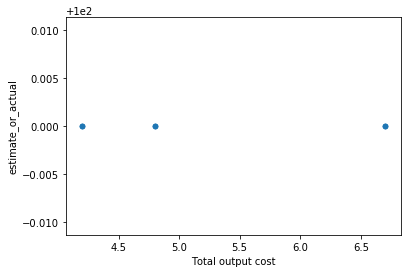

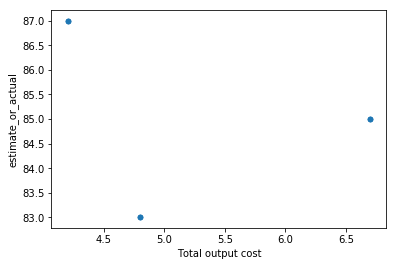

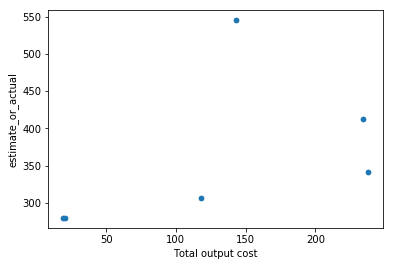

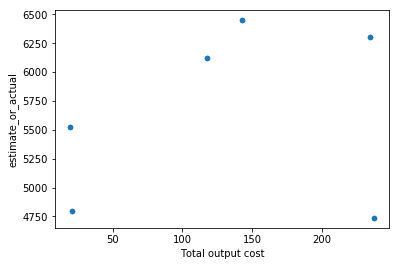

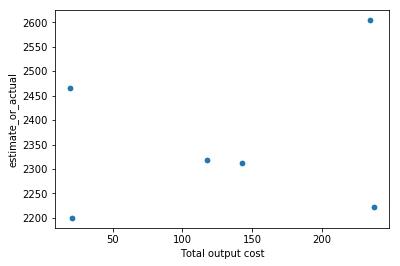

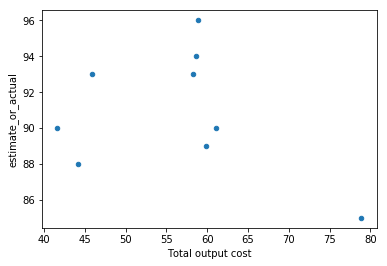

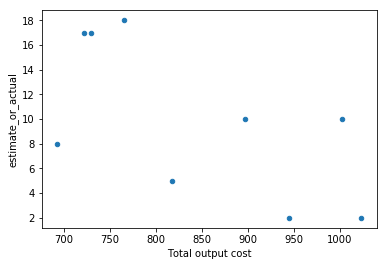

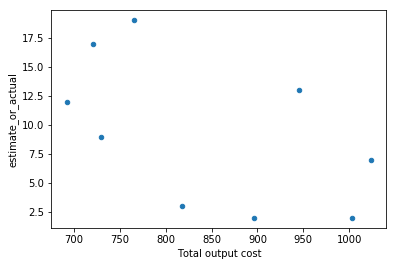

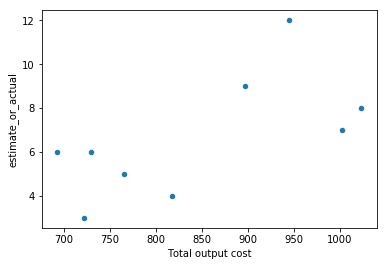

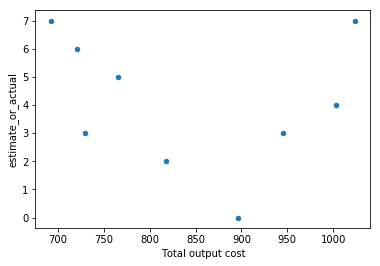

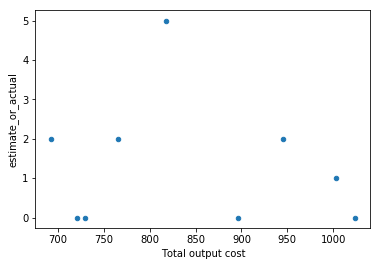

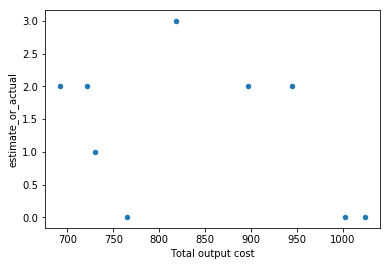

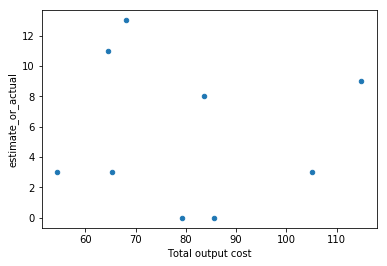

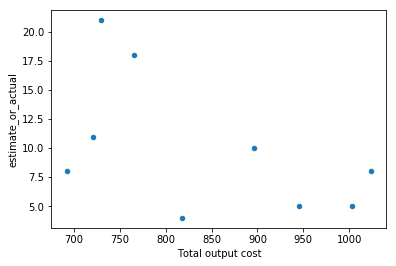

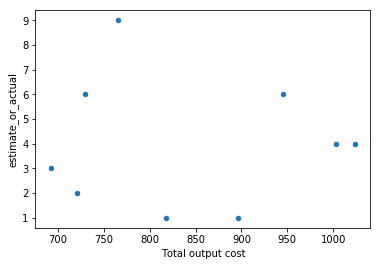

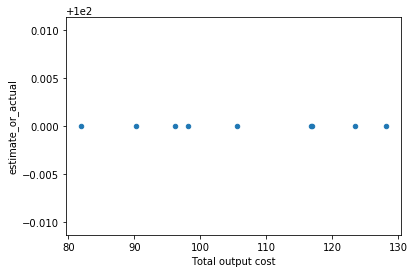

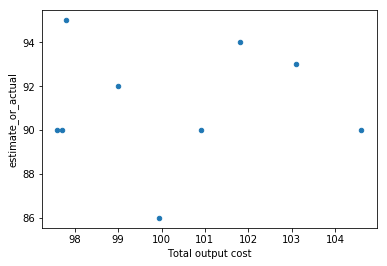

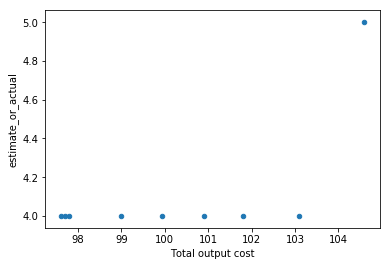

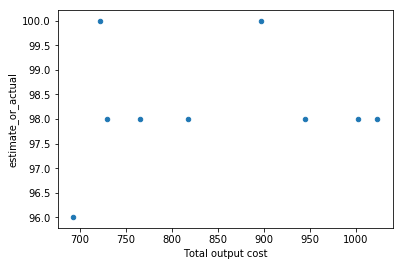

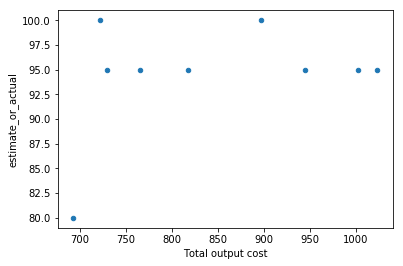

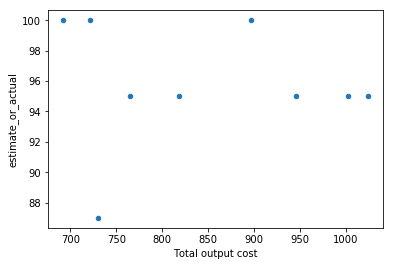

In [378]:
# Plot (on separate plots) top 20 best (by datapoints) deliverable Total output cost vs estimate_or_actual
df = data6
for i, deliverable in enumerate(deliverable_datapoints(df)):
    deliverable.plot(kind = 'scatter', x = 'Total output cost', y = 'estimate_or_actual')
    if i == 20:
        break

In [380]:
# Find how well all deliverables are correlated to Total ouput cost
from sklearn.metrics import r2_score
tmp = data6.copy()
d = deliverables2.copy()
d['R2'] = 0
x = df['Total output cost']
y = df['estimate_or_actual']
for did in d['deliverable_id']:
    df = get_deliverable(tmp, did)
    d.loc[d['deliverable_id'] == did, 'R2'] = r2_score(df['Total output cost'], df['estimate_or_actual'])

d.sort_values(by = 'R2', ascending = False)

,deliverable_id,count,program_name,deliverable,R2
533,264,2,"Government-wide leadership, reform and implementation","Whole of government forums, meetings and advisory groups chaired",3.134106e-01
621,328,2,Public sector integrity,Timeline agreed by FOI applicants for completion of reviews is met,2.391493e-01
78,22,9,Non-Admitted Services,Patients treated in Specialist Outpatient Clinics – unweighted,1.211719e-01
391,357,4,Resources,Exploration and mining licences which are active,1.801512e-02
762,162,1,Sport and Recreation,Sporting club grants: number approved,0.000000e+00
704,750,1,Local Government,Meetings held with Local Government Mayoral Advisory Panel,0.000000e+00
705,171,1,Gender equality and the prevention of family violence policy and programs,Women and the Prevention of Family Violence service agreements and contracts deliver agreed outcomes for the prevention of family violence and the social and economic participation of women,0.000000e+00
706,170,1,Gender equality and the prevention of family violence policy and programs,"Number of women participating in funded programs, projects and events",0.000000e+00
707,758,1,Fire and Emergency Management,Statewide bushfire risk is maintained at or below the target,0.000000e+00
708,752,1,Local Government,Public Library Services grant payments made within 21 days of completion of agreed milestones in the funding agreement,0.000000e+00


In [83]:
# For said programs of interest, run some visualisations on 'actual' vs total output cost over time.
# STILL TO DO